# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [408]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

SEED = 42

random.seed(SEED)
np.random.seed(SEED)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

Для воспроизводимости результатов. Устанавливаем одинаковые сиды для random из SPL и для numpy, чтобы была согласованность между разными библиотеками.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [409]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)
df_train.info()
df_test.info()

Train data shape: (6999, 13)
Test data shape:  (1000, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   

### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [x] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [x] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [x] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [x] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [410]:
# 10 случайных строк тренировочного датасета
random_rows = df_train.sample(n=10, random_state=SEED)
display(random_rows)

# первые 5 и последние 5 объектов тестового датасета
test_first_5 = df_test.head(5)
test_last_5 = df_test.tail(5)
display(test_first_5)
display(test_last_5)

# вывод названий колонок, для которых есть пропущенные значения, и кол-ва пропущеных значений
def check_missing_values(df_train, df_test):
    missing_train = df_train.isnull().sum()
    missing_test = df_test.isnull().sum()

    print("Пропуски в train:")
    display(missing_train[missing_train > 0])

    print("Пропуски в test:")
    display(missing_test[missing_test > 0])

check_missing_values(df_train, df_test)

# проверка дубликатов
duplicates_train = df_train.duplicated().sum()
duplicates_test = df_test.duplicated().sum()
print(f"Дубликаты в train: {duplicates_train}")
print(f"Дубликаты в test: {duplicates_test}")

# bonus: дашборд ydata-profiling
!pip install ydata-profiling
from ydata_profiling import ProfileReport

df_train_copy = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test_copy = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

# отчет для train
profile_train = ProfileReport(df_train_copy, title="Cars Train Report", explorative=True)
profile_train.to_file("cars_train_report.html")

# отчет для test
profile_test = ProfileReport(df_test_copy, title="Cars Test Report", explorative=True)
profile_test.to_file("cars_test_report.html")

# общий отчет (train/test)
df_combined = pd.concat([df_train_copy, df_test_copy], keys=["train", "test"])
profile_combined = ProfileReport(df_combined, title="Cars Train/Test Report", explorative=True)
profile_combined.to_file("combined_data_report.html")


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Пропуски в train:


,0
mileage,202
engine,202
max_power,196
torque,203
seats,202


Пропуски в test:


,0
mileage,19
engine,19
max_power,19
torque,19
seats,19


Дубликаты в train: 985
Дубликаты в test: 62


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете по *тренировочному* набору данных и им же заполняете *тестовый*.

In [411]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df_train.select_dtypes(include=['object']).columns

numeric_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df_train[numeric_columns] = numeric_imputer.fit_transform(df_train[numeric_columns])
df_train[cat_columns] = cat_imputer.fit_transform(df_train[cat_columns])

df_test[numeric_columns] = numeric_imputer.transform(df_test[numeric_columns])
df_test[cat_columns] = cat_imputer.transform(df_test[cat_columns])

check_missing_values(df_train, df_test)

Пропуски в train:


,0


Пропуски в test:


,0


### **Задание 2 (0.5 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [x] Отобразите такие объекты (0.15 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [412]:
def process_duplicates(df_train, target_col):
    df_train_wo_target = df_train.drop(columns=[target_col])

    duplicate_rows = df_train[df_train.duplicated(subset=df_train_wo_target.columns, keep=False)]
    display(duplicate_rows)

    df_train_sorted = df_train.sort_values(by=target_col, ascending=True)
    df_train_unique = df_train_sorted.drop_duplicates(subset=df_train_wo_target.columns, keep='first')

    df_train_unique = df_train_unique.reset_index(drop=True)

    return df_train_unique

target_col = 'selling_price'
df_train = process_duplicates(df_train, target_col)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016.0,575000.0,45000.0,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018.0,254999.0,25000.0,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017.0,670000.0,70000.0,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003.0,70000.0,50000.0,Petrol,Individual,Manual,Second Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
29,Maruti Omni 8 Seater BSIV,2012.0,150000.0,35000.0,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018.0,750000.0,24000.0,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018.0,746000.0,24000.0,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015.0,625000.0,50000.0,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013.0,290000.0,25000.0,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [413]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [414]:
def preprocess_df(df):
    df['mileage'] = df['mileage'].str.replace(r' kmpl| km/kg', '', regex=True).astype(float)
    df['engine'] = df['engine'].str.replace(r' CC', '', regex=True).astype(float)
    df['max_power'] = df['max_power'].str.replace(r' bhp', '', regex=True)
    df['max_power'] = df['max_power'].replace('', '0.0').astype(float)

    # пример, как можно было предобработать torque: извлечь только числовое значение
    # df['torque'] = df['torque'].str.extract(r'(\d+)', expand=False).astype(float)

    df.drop(columns=['torque'], inplace=True)

    return df

df_train = preprocess_df(df_train)
df_test = preprocess_df(df_test)

display(df_train.head())
display(df_test.head())

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti 800 AC,1997.0,29999.0,80000.0,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.0,4.0
1,Maruti Zen LXI,2001.0,30000.0,10000.0,Petrol,Individual,Manual,First Owner,17.3,993.0,60.0,5.0
2,Hyundai Santro GLS I - Euro I,2000.0,30000.0,90000.0,Petrol,Individual,Manual,Third Owner,18.9,1248.0,74.0,5.0
3,Maruti 800 Std,2004.0,31504.0,110000.0,Petrol,Individual,Manual,Third Owner,16.1,796.0,37.0,4.0
4,Maruti 800 AC,1998.0,35000.0,40000.0,Petrol,Individual,Manual,Second Owner,16.1,796.0,37.0,4.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010.0,229999.0,168000.0,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017.0,665000.0,25000.0,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007.0,175000.0,218463.0,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015.0,635000.0,173000.0,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011.0,130000.0,70000.0,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.

In [415]:
def convert_cols_to_int(df, cols: list[str]):
  for col in cols:
    df[col] = df[col].astype(int)

convert_cols_to_int(df_train, ['engine', 'seats'])
convert_cols_to_int(df_test, ['engine', 'seats'])

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5840 non-null   object 
 1   year           5840 non-null   float64
 2   selling_price  5840 non-null   float64
 3   km_driven      5840 non-null   float64
 4   fuel           5840 non-null   object 
 5   seller_type    5840 non-null   object 
 6   transmission   5840 non-null   object 
 7   owner          5840 non-null   object 
 8   mileage        5840 non-null   float64
 9   engine         5840 non-null   int64  
 10  max_power      5840 non-null   float64
 11  seats          5840 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 547.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name          

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [416]:
def calculate_stats(df):
    numeric_stats = df.describe(include=[float, int])
    categorical_stats = df.describe(include=[object])

    return numeric_stats, categorical_stats

train_numeric_stats, train_categorical_stats = calculate_stats(df_train)
test_numeric_stats, test_categorical_stats = calculate_stats(df_test)

print("Статистики по числовым столбцам, train:")
display(train_numeric_stats)
print("Статистики по категориальным столбцам, train:")
display(train_categorical_stats)
print("Статистики по числовым столбцам, test:")
display(test_numeric_stats)
print("Статистики по категориальным столбцам, test:")
display(test_categorical_stats)

Статистики по числовым столбцам, train:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.221003e+05,7.395224e+04,19.415872,1429.448973,87.646056,5.426712
std,4.095622,5.346781e+05,6.007114e+04,3.987056,485.662834,31.737685,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,19.100000,1248.000000,81.800000,5.000000
75%,2017.000000,6.350000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Статистики по категориальным столбцам, train:


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Статистики по числовым столбцам, test:


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.329880,1454.87600,90.692330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.952201,521.99574,34.948341,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.250000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Статистики по категориальным столбцам, test:


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


In [417]:
assert df_train.shape == (5840, 12) # удалили torque

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [x] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

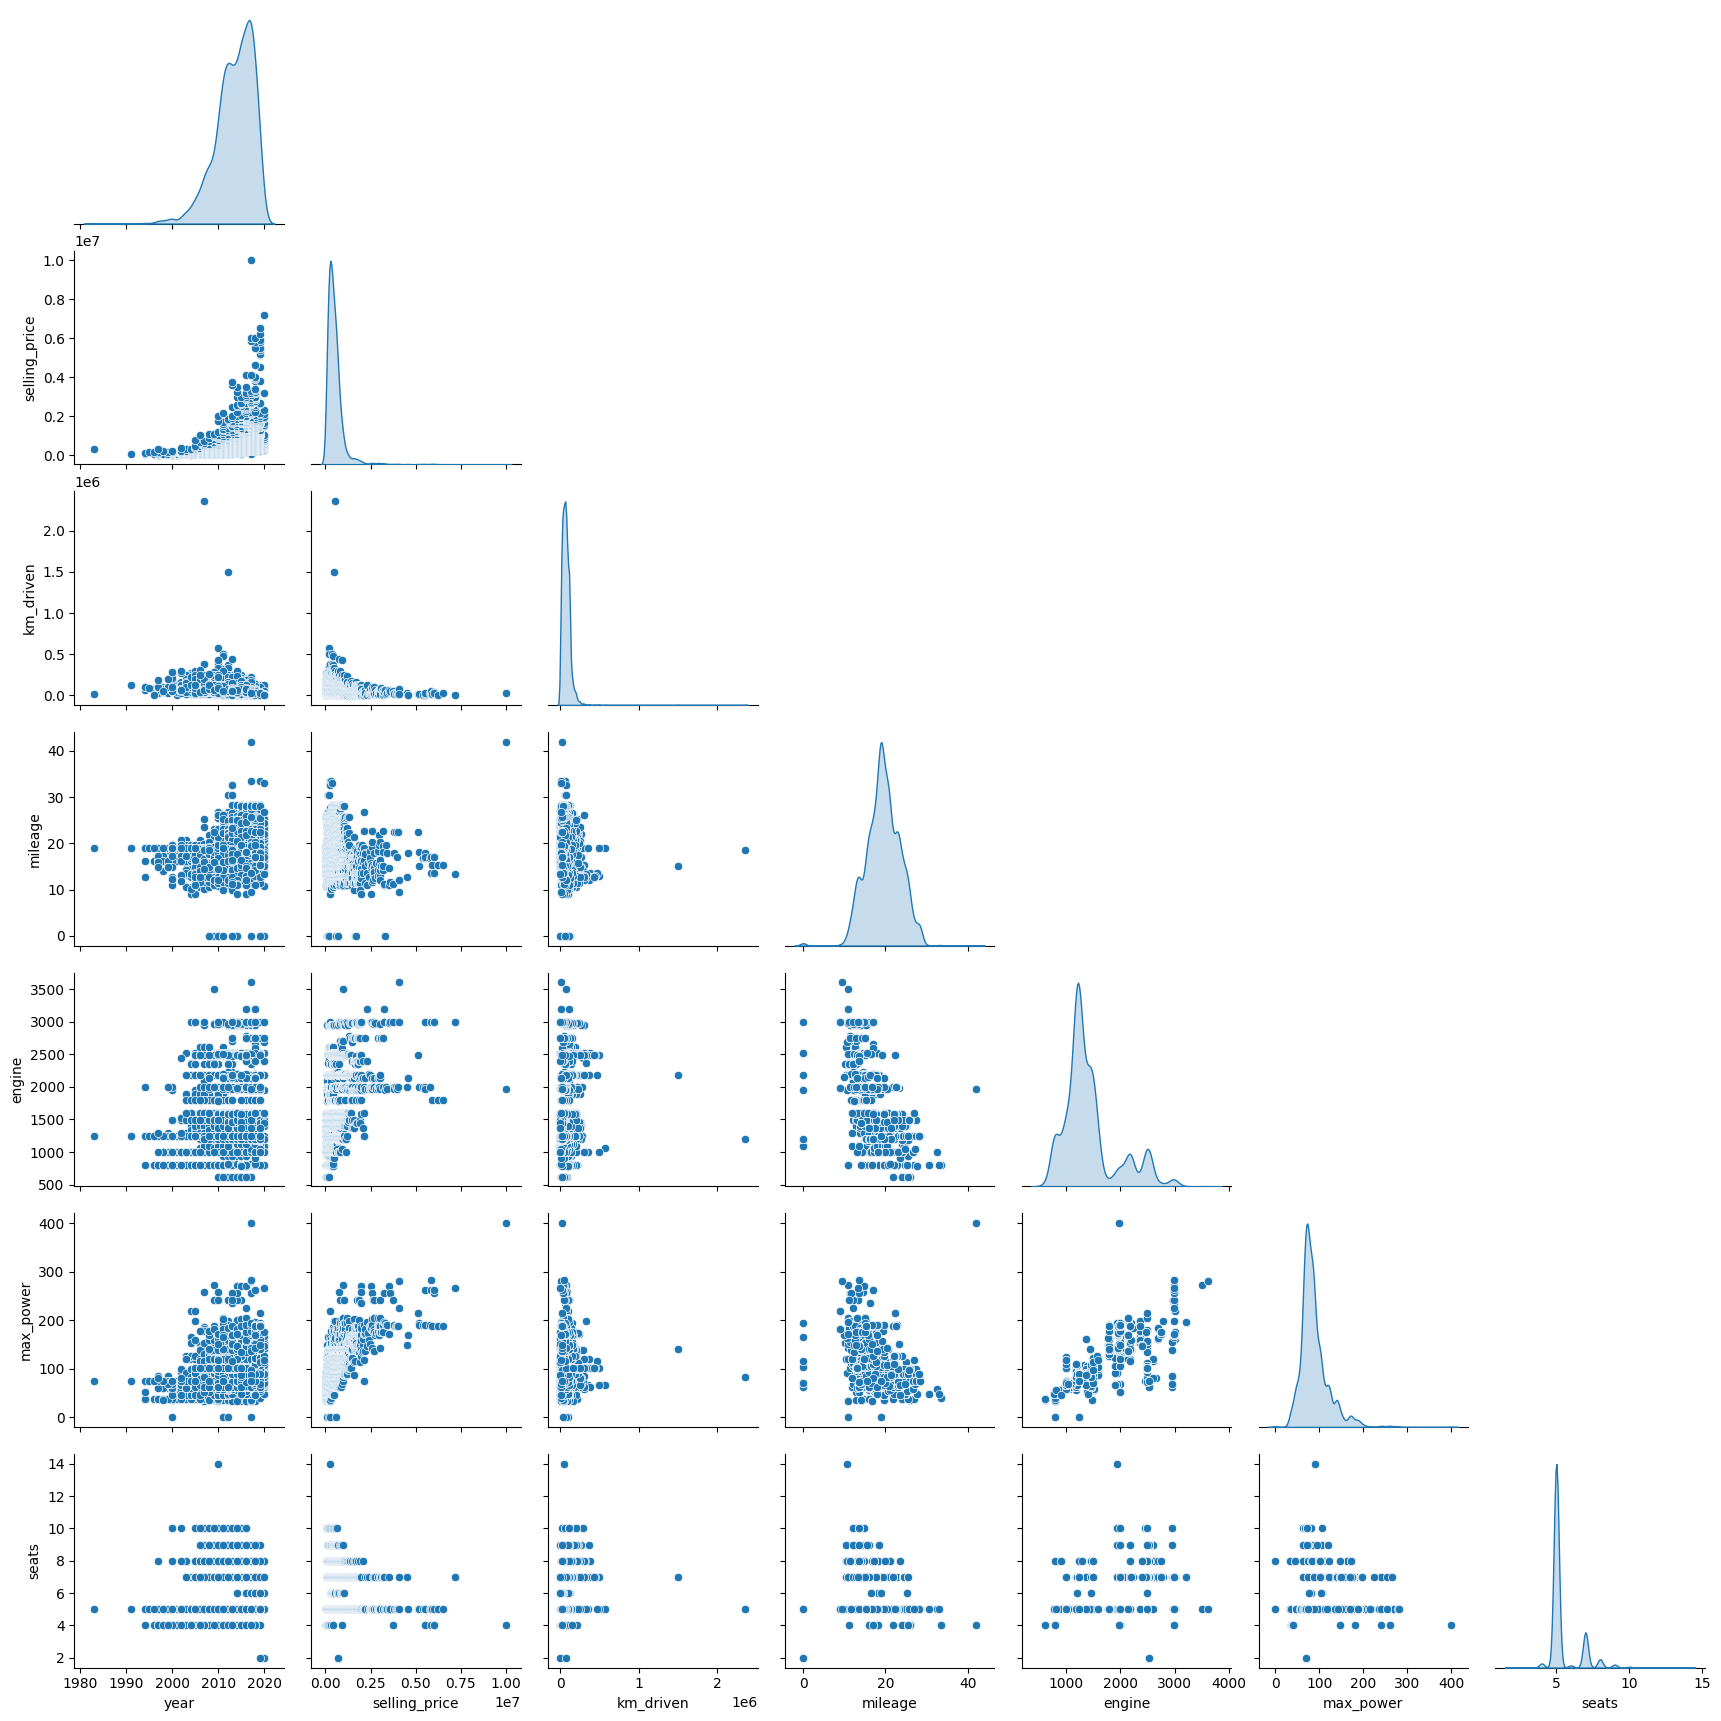

In [418]:
def visualize_pairplot(df):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    sns.pairplot(numeric_df, hue=None, diag_kind="kde", corner=True)
    plt.show()

visualize_pairplot(df_train)

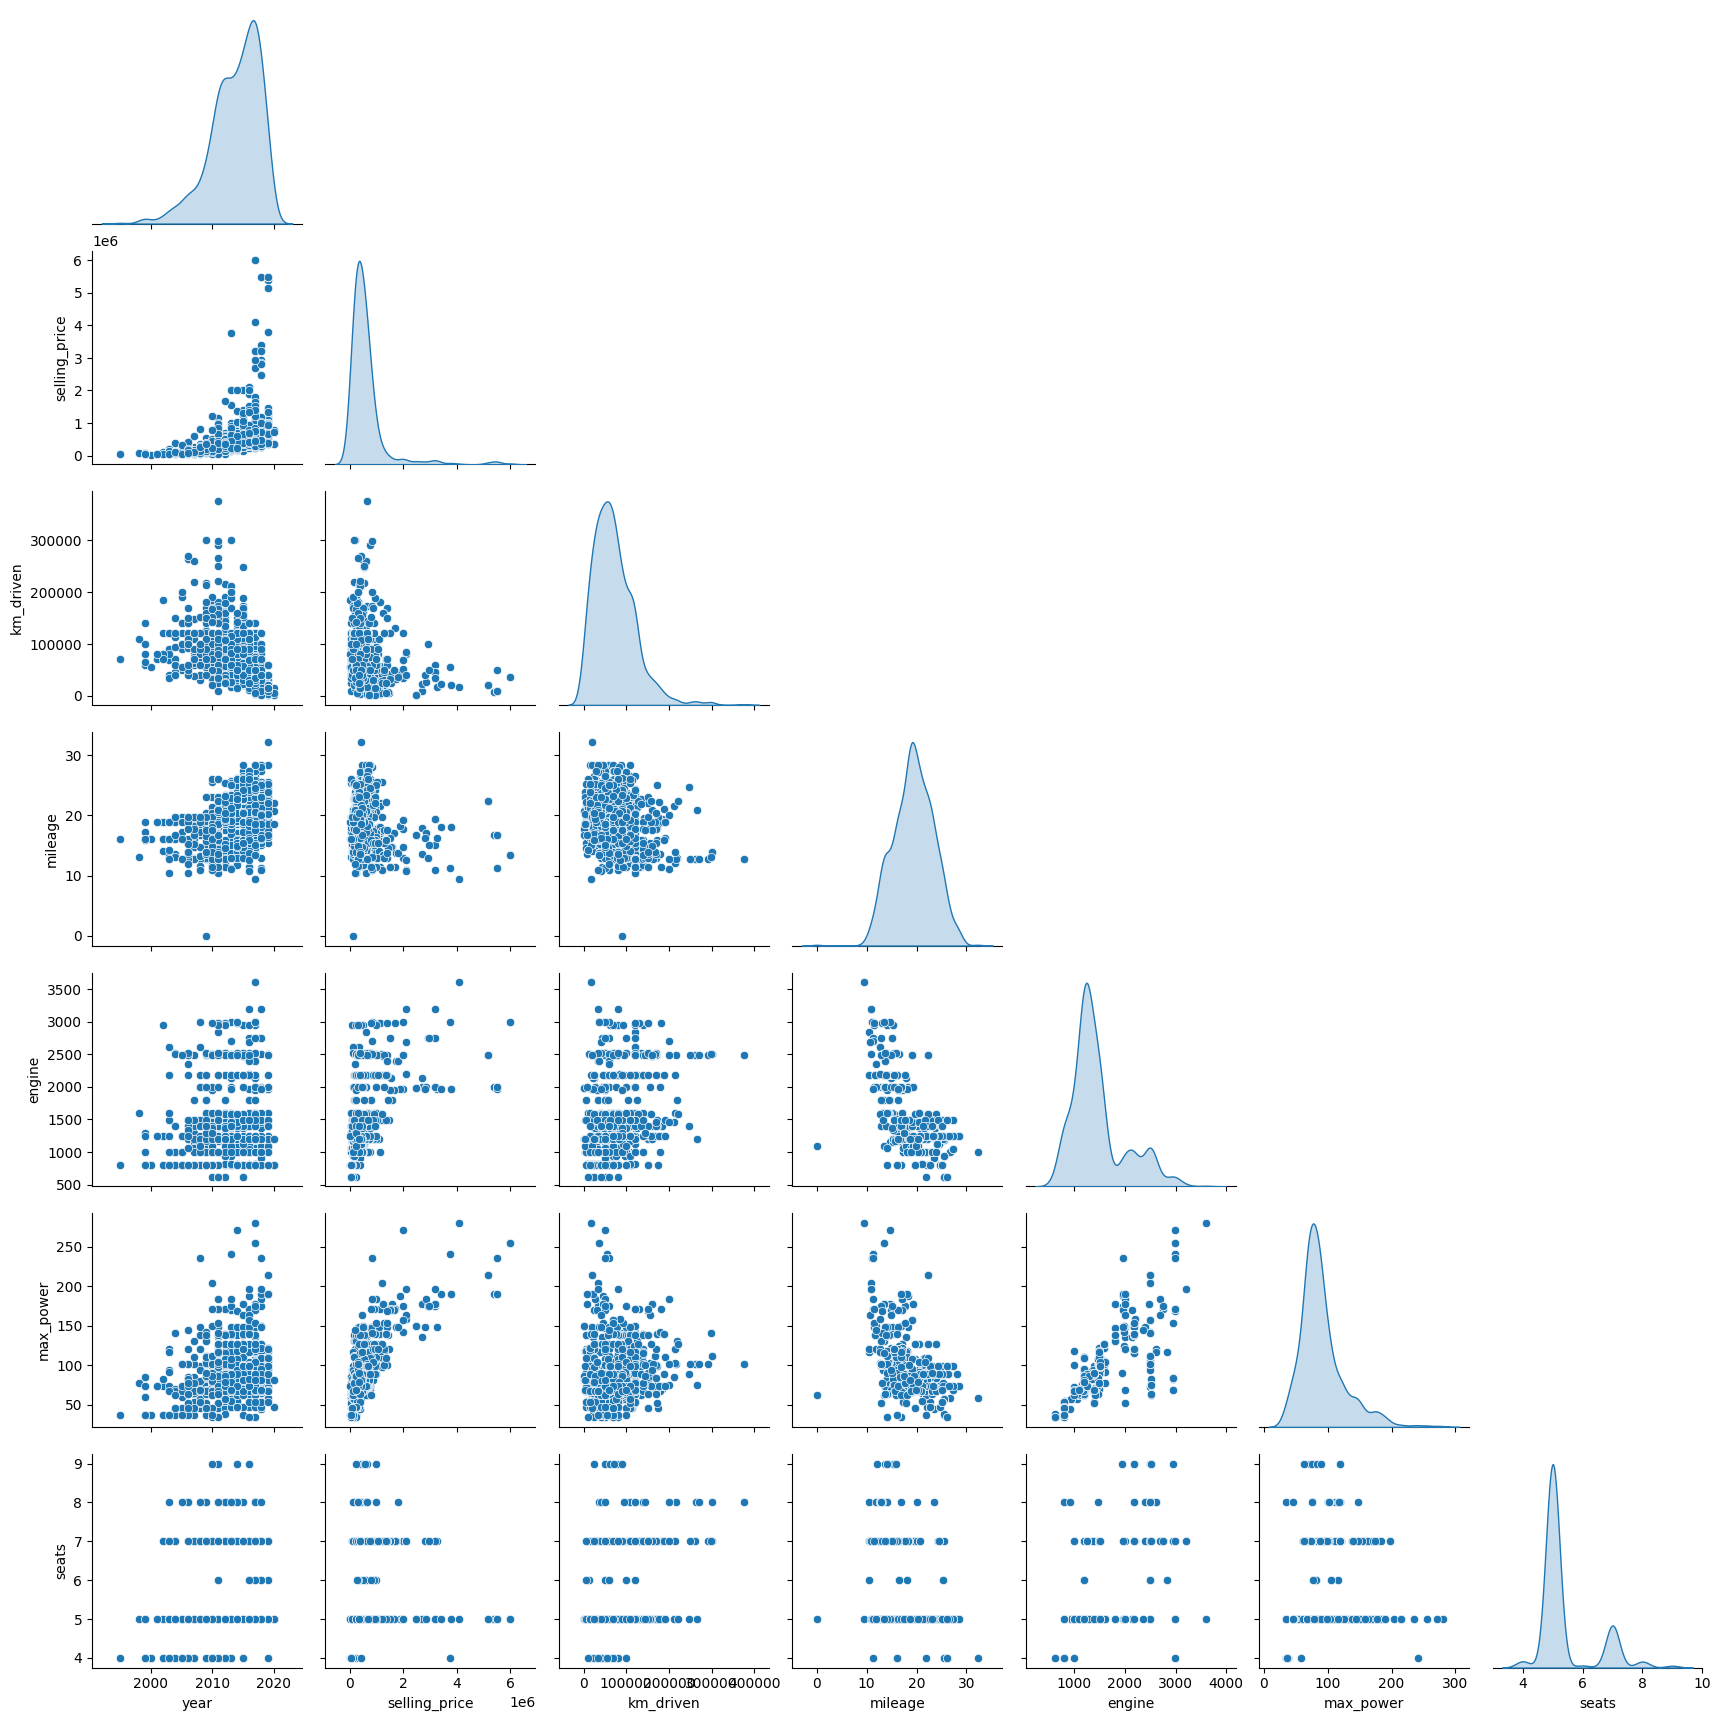

In [419]:
visualize_pairplot(df_test)

**Можно ли предположить на основе распределений связь признаков с целевой переменной?**

Да, на графике наблюдается связь некоторых признаков с целевой переменной:

- year: видим сильную положительную связь. Новые автомобили, как правило, стоят дороже, это интуитивно понятно;
- km_driven: связь отрицательная, чем больше пробег - тем меньше цена;
- engine и max_power: у этих признаков наблюдается небольшая положительная связь с ценой продажи, у max_power она чуть выраженнее;
- mileage: у топливной экономичности заметна слабая отрицательная связь с ценой продажи. Скорее всего, связано с тем, что экономные автомобили часто дешевле, чем мощные, но менее экономичные премиальные модели автомобилей.

**Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?**

Да, по графику видно, что у нескольких признаков имеются корреляции:
- engine и mileage. Просматривается очень слабая отрицательная корреляцая, можно объяснить тем, что автомобили с более мощными двигателями расходуют больше топлива и являются менее экономичными;
- mileage и year. Видим слабую положительную корреляцию. Вероятно, существует тенднция выпуска более экологичных и экономичных автомобилей а последние годы;
- year и km_driven. Очень незначительная отрицательная корреляция, можно объяснить тем, что более новые автомобили должны иметь меньший пробег;
- engine и max_power. Значительная положительная корреляция, мощнее двигатель - больше лошадиных сил.


**Похожими ли оказались совокупности при разделении на трейн и тест?**
Да, визуальный анализ показывает, что совокупности выглядят очень похожими. В наборах наблюдаются аналогичные связи и корреляции между признаками, а значит, выборки отражают одни и те же закономерности. Это свидетельствует о хорошем качестве разделения данных. Модель, обученная на тренировочной совокупности, скорей всего, будет хорошо обобщать результаты на тестовую выборку.



### **Задание 7 (0.5 балла)**

Итак, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427392,-0.368966,0.346899,0.002819,0.169708,0.041178
selling_price,0.427392,1.000000,-0.164945,-0.103133,0.448097,0.695816,0.149909
km_driven,-0.368966,-0.164945,1.000000,-0.183123,0.229766,0.022028,0.192328
mileage,0.346899,-0.103133,-0.183123,1.000000,-0.571335,-0.369325,-0.449306
engine,0.002819,0.448097,0.229766,-0.571335,1.000000,0.682505,0.652172
max_power,0.169708,0.695816,0.022028,-0.369325,0.682505,1.000000,0.245578
seats,0.041178,0.149909,0.192328,-0.449306,0.652172,0.245578,1.000000


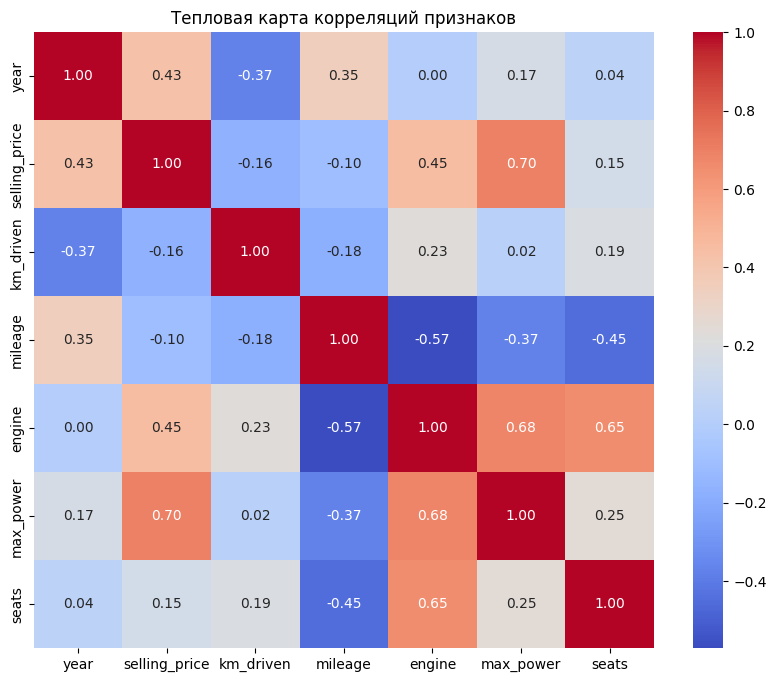

In [420]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64'])
corr_matrix = df_train_numeric.corr()

display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Тепловая карта корреляций признаков")
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Какие 2 признака наименее скоррелированы между собой?**

Корреляция между признаками engine и year практически отсутствует, её значение наименьшее - 0.002819.

**Между какими наблюдается довольно сильная положительная линейная зависимость?**

Между признаками engine и max_power наблюдается довольно сильная положительная линейная зависимость - коэффициент корреляции равен 0.682505.

**Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?**

Между признаками year и km_driven существует незначительная отрицательная корреляция (коэффициент -0.368966). Можно сказать, что более старые машины к моменту продажи обычно имеют больший пробег, но эта связь не слишком сильная. На пробег могут влиять многие другие факторы, такие как тип автомобиля, условия эксплуатации и другие.

Утверждение можно считать частично верным, но для более точных выводов потребуется дополнительный анализ, возможно, с учетом других признаков.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

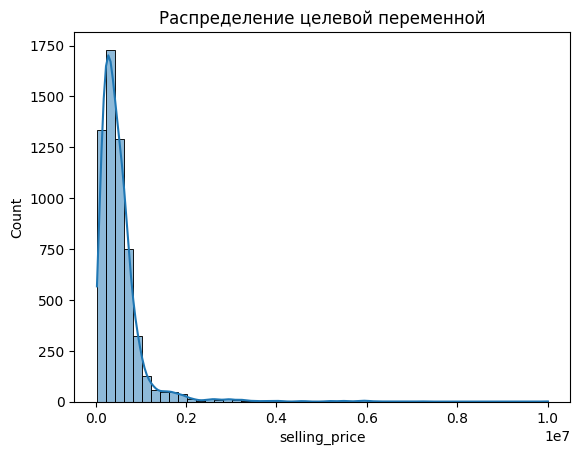

In [421]:
sns.histplot(df_train['selling_price'], kde=True, bins=50)
plt.title("Распределение целевой переменной")
plt.show()

Имеется сильная положительная асимметрия - видим длинный правый хвост. Это означает, что большинство автомобилей имеют низкие цены, но есть несколько автомобилей с очень высокими ценами.

Это может говорить о наличии выбросов. Что можно предпринять:
- исследовать наборы на выбросы и обработать или удалить их
- прологарифмировать целевую переменную: это уменьшит влияние выбросов и поможет улучшить результаты прогнозов, поскольку сбалансирует данные


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [422]:
df_train_numeric = df_train.select_dtypes(include=['float64', 'int64']).copy()

y_train = df_train['selling_price']
X_train = df_train_numeric.drop(columns=['selling_price'])

In [423]:
assert X_train.shape == (5840, 6)

In [424]:
df_test_numeric = df_test.select_dtypes(include=['float64', 'int64']).copy()

y_test = df_test['selling_price']
X_test = df_test_numeric.drop(columns=['selling_price'])

In [425]:
assert X_test.shape == (1000, 6)

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [426]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg_model = LinearRegression()

def train_and_evaluate_linreg_model(linreg_model, X_train, X_test, y_train, y_test, evaluate=True):
    linreg_model.fit(X_train, y_train)

    train_pred = linreg_model.predict(X_train)
    test_pred = linreg_model.predict(X_test)

    if evaluate:
      train_r2 = r2_score(y_train, train_pred)
      train_mse = MSE(y_train, train_pred)

      test_r2 = r2_score(y_test, test_pred)
      test_mse = MSE(y_test, test_pred)

      print("Метрики для train:")
      print(f"R² = {train_r2:.4f}")
      print(f"MSE = {train_mse:.4f}")
      print("Метрики для test:")
      print(f"R² = {test_r2:.4f}")
      print(f"MSE = {test_mse:.4f}")

    return test_pred

lingreg_test_pred = train_and_evaluate_linreg_model(linreg_model, X_train, X_test, y_train, y_test)


Метрики для train:
R² = 0.5911
MSE = 116888307182.9373
Метрики для test:
R² = 0.5927
MSE = 234130184983.8934


**Выводы:**

Коэффициент детерминации на уровне 0.59 - средний результат, есть потенциал для улучшения. Можно попробовать более сложные модели или провести дополнительную обработку данных.

Разница в значениях для наборов train и test очень незначительная, что говорит о том, что модель не переобучена.

Наша целевая переменная - стоимость автомобиля. Элитные марки могут стоить очень дорого, разброс цен может быть огромным, потому высокое абсолютное значение MSE в данном случае допустимо.

Можно заметить, что MSE на test значительно выше, чем на train. Это может говорить о том, что в наборе test присутствуют выбросы, которые плохо предсказываются моделью. Однако близость значений коэффициента детерминации у train и set говорит о том, что в целом модель адекватно справляется с задачей предсказания.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [427]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

display(X_train_scaled.head())
display(X_test_scaled.head())

linreg_model_scaled = LinearRegression()

lingreg_scaled_test_pred = train_and_evaluate_linreg_model(linreg_model_scaled, X_train_scaled, X_test_scaled, y_train, y_test)

,year,km_driven,mileage,engine,max_power,seats
0,-4.011560,0.100685,-0.831730,-1.304409,-1.595907,-1.452480
1,-3.034823,-1.064700,-0.530731,-0.898744,-0.871154,-0.434419
2,-3.279007,0.267169,-0.129398,-0.373643,-0.430001,-0.434419
3,-2.302271,0.600136,-0.831730,-1.304409,-1.595907,-1.452480
4,-3.767375,-0.565249,-0.831730,-1.304409,-1.595907,-1.452480


,year,km_driven,mileage,engine,max_power,seats
0,-0.837167,1.565740,-1.358480,2.200379,0.767417,1.601702
1,0.872122,-0.814974,0.522768,0.139102,0.657128,-0.434419
2,-1.569719,2.405866,-1.634396,0.760986,1.334614,-0.434419
3,0.383754,1.648982,1.425768,0.141162,0.345170,-0.434419
4,-0.592983,-0.065798,-0.731397,-0.530144,-0.713599,-0.434419


Метрики для train:
R² = 0.5911
MSE = 116888307182.9375
Метрики для test:
R² = 0.5927
MSE = 234130184983.8824


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [428]:
linreg_model_scaled = LinearRegression()

train_and_evaluate_linreg_model(linreg_model_scaled, X_train_scaled, X_test_scaled, y_train, y_test)

def get_sorted_coefficients(model, feature_names):
    coefs = model.coef_

    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coef': coefs
    })

    # Добавляем абсолютные значения коэффициентов
    coef_df['abs_coef'] = coef_df['coef'].abs()

    # Сортируем по абсолютным значениям коэффициентов
    coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

    return coef_df[['feature', 'coef', 'abs_coef']]

coef_df = get_sorted_coefficients(linreg_model_scaled, X_train.columns)
display(coef_df)

Метрики для train:
R² = 0.5911
MSE = 116888307182.9375
Метрики для test:
R² = 0.5927
MSE = 234130184983.8824


,feature,coef,abs_coef
4,max_power,322673.268138,322673.268138
0,year,147954.316179,147954.316179
3,engine,60924.616357,60924.616357
1,km_driven,-44938.588565,44938.588565
2,mileage,28801.503172,28801.503172
5,seats,-23337.647262,23337.647262


**Какой признак оказался наиболее информативным в предсказании цены?**

Наиболее информативным признаком в предсказании цены оказался признак **max_power**.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [429]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_test_pred = train_and_evaluate_linreg_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test)

Метрики для train:
R² = 0.5911
MSE = 116888307193.1102
Метрики для test:
R² = 0.5927
MSE = 234130859737.8709


In [430]:
print("Коэффициенты Lasso:", lasso_model.coef_)

Коэффициенты Lasso: [147954.12794923 -44937.45602704  28799.62284361  60919.73960792
 322674.19368634 -23334.74898558]


 L1-регуляризация штрафует большие значения коэффициентов, если коэффициент незначителен для предсказания целевой переменной - его значение будет уменьшено до нуля. В данном случае такого не наблюдается, значит, все коэффициенты вносят значимый вклад в модель.

 Можно попробовать подобрать другое значение гиперпараметра alpha (величина штрафа) с помощью кросс-валидации, и по метрикам модели выбрать его оптимальное значение.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [x] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [431]:
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]}

grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

lasso_opt_test_pred = train_and_evaluate_linreg_model(
    linreg_model=best_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test
)

Метрики для train:
R² = 0.5880
MSE = 117750673580.1811
Метрики для test:
R² = 0.5801
MSE = 241376510029.8037


In [432]:
print(f"Количество обученных моделей GridSearchCV: {grid_search.n_splits_ * len(param_grid['alpha'])}")
print(f"Лучший коэффициент регуляризации (alpha): {grid_search.best_params_['alpha']}")
coef_df = get_sorted_coefficients(best_model, X_train_scaled.columns)
display(coef_df)

Количество обученных моделей GridSearchCV: 90
Лучший коэффициент регуляризации (alpha): 10000


,feature,coef,abs_coef
4,max_power,329411.345481,329411.345481
0,year,146936.894940,146936.894940
1,km_driven,-33501.726538,33501.726538
3,engine,17351.609596,17351.609596
2,mileage,9332.895891,9332.895891
5,seats,-0.000000,0.000000


**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [433]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000],
    'l1_ratio': [0.01, 0.1, 0.5, 0.7, 1]
}

e_grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

e_grid_search.fit(X_train_scaled, y_train)

best_model = e_grid_search.best_estimator_
best_params = e_grid_search.best_params_

print(f"Количество обученных моделей GridSearchCV: {len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10}")
print(f"Лучшие гиперпараметры: {best_params}")

elastic_opt_test_pred = train_and_evaluate_linreg_model(
    linreg_model=best_model,
    X_train=X_train_scaled,
    X_test=X_test_scaled,
    y_train=y_train,
    y_test=y_test
)

Количество обученных моделей GridSearchCV: 450
Лучшие гиперпараметры: {'alpha': 1, 'l1_ratio': 0.1}
Метрики для train:
R² = 0.4955
MSE = 144207856291.6904
Метрики для test:
R² = 0.4312
MSE = 326945917096.3113


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [x] Удалить столбец`name`

In [434]:
X_train_cat = df_train.drop(columns=['selling_price'])
X_test_cat = df_test.drop(columns=['selling_price'])

X_train_cat['name_proc'] = X_train_cat['name']
X_test_cat['name_proc'] = X_test_cat['name']
X_train_cat.drop('name', axis=1, inplace=True)
X_test_cat.drop('name', axis=1, inplace=True)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [435]:
assert X_train_cat.shape == (5840, 11) # оставили столбец для предобработки

def preprocess_name(X_cat, threshold=20):
    # оставим только марки машин
    X_cat['name_proc'] = X_cat['name_proc'].apply(lambda x: x.split()[0])

    # считаем количество уникальных значений в выборке
    value_counts = X_cat['name_proc'].value_counts()

    # заменим все марки, встречающиеся ниже threshold, на категорию other
    X_cat['name_proc'] = X_cat['name_proc'].apply(
        lambda x: x if value_counts[x] >= threshold else 'other'
    )

    return X_cat

X_train_cat = preprocess_name(X_train_cat, threshold=20)
X_test_cat = preprocess_name(X_test_cat, threshold=20)

display(X_train_cat['name_proc'].value_counts())
display(X_test_cat['name_proc'].value_counts())

,count
name_proc,
Maruti,1804
Hyundai,1058
Mahindra,611
Tata,534
Toyota,309
Honda,308
Ford,308
Chevrolet,188
Renault,171


,count
name_proc,
Maruti,290
Hyundai,198
Tata,106
other,97
Mahindra,90
Toyota,59
Honda,57
Ford,50
Renault,29


In [436]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner,name_proc
count,5840,5840,5840,5840,5840
unique,4,3,2,5,19
top,Diesel,Individual,Manual,First Owner,Maruti
freq,3177,5223,5336,3603,1804


### **Задание 15 (0.4 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [437]:
# кодирование происходит в ячейке ниже в рамках единого pipeline

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [438]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

numerical_features = X_train_cat.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train_cat.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ]
)

ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]}

grid_search = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

grid_search.fit(X_train_cat, y_train_log)

best_ridge_model = grid_search.best_estimator_

train_pred_log = best_ridge_model.predict(X_train_cat)
test_pred_log = best_ridge_model.predict(X_test_cat)

# убираем логарифмирование перед расчетом метрик
train_pred = np.expm1(train_pred_log)
test_pred = np.expm1(test_pred_log)

train_r2 = r2_score(y_train, train_pred)
train_mse = MSE(y_train, train_pred)

test_r2 = r2_score(y_test, test_pred)
test_mse = MSE(y_test, test_pred)

print("Метрики для train:")
print(f"R² = {train_r2:.4f}")
print(f"MSE = {train_mse:.4f}")
print("Метрики для test:")
print(f"R² = {test_r2:.4f}")
print(f"MSE = {test_mse:.4f}")

ridge_opt_test_pred = test_pred

Метрики для train:
R² = 0.8816
MSE = 33845829219.5530
Метрики для test:
R² = 0.8580
MSE = 81610791244.6859


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


После ряда экспериментов качество прогнозов удалось значительно улучшить следующими действиями:
- масштабированием числовых признаков с помощью MinMaxScaler;
- кодированием категориальных признаков через OneHotEncoder, с включением преобразованного столбца name;
- логарифмированием целевой переменной, метрики считались по экспоненционированным прогнозам для возвращения значений к исходной шкале. Это действие также существено уменьшило переобучение.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [439]:
def business_metric(y_true, y_pred):
    percent_diff = np.abs((y_true - y_pred) / y_true)
    valid_predictions = percent_diff <= 0.1

    return np.mean(valid_predictions)

# вычисляем метрику для всех обученных моделей
linreg_metric = business_metric(y_test, lingreg_test_pred)
linreg_scaled_metric = business_metric(y_test, lingreg_scaled_test_pred)
lasso_metric = business_metric(y_test, lasso_test_pred)
lasso_opt_metric = business_metric(y_test, lasso_opt_test_pred)
elastic_opt_metric = business_metric(y_test, elastic_opt_test_pred)
ridge_opt_metric = business_metric(y_test, ridge_opt_test_pred)

print(f"Linear Regression: {linreg_metric:.2f}")
print(f"Scaled Linear Regression: {linreg_scaled_metric:.2f}")
print(f"Lasso Regression: {lasso_metric:.2f}")
print(f"GridSearch Best Lasso Regression: {lasso_opt_metric:.2f}")
print(f"GridSearch Best ElasticNet Regression: {elastic_opt_metric:.2f}")
print(f"GridSearch Best Ridge Regression: {ridge_opt_metric:.2f}")

Linear Regression: 0.22
Scaled Linear Regression: 0.22
Lasso Regression: 0.22
GridSearch Best Lasso Regression: 0.23
GridSearch Best ElasticNet Regression: 0.22
GridSearch Best Ridge Regression: 0.32


Лучше всего задачу бизнеса решает модель Ridge-регрессии с гиперпараметрами, подобранными с помощью GridSearch.

На втором месте находится оптимизированная через GridSearch модель Lasso-регрессии.

Остальные модели имеют одинаковое значение метрики и занимают последнее место по эффективности.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [440]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Это кот **@sabrina_sadiekh**.